In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

In [7]:
df = pd.read_csv('medicaldata.csv')

In [8]:
df.shape

(768, 9)

In [9]:
df.head()

,pregnancies,plasma glucose concentration,diastolic blood pressure,triceps skinfold thickness,insulin,body mass index,diabetes pedigree function,age,diabetic
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [10]:
df.isnull().sum()

pregnancies                     0
plasma glucose concentration    0
diastolic blood pressure        0
triceps skinfold thickness      0
insulin                         0
body mass index                 0
diabetes pedigree function      0
age                             0
diabetic                        0
dtype: int64

In [11]:
df['diabetic'].value_counts()/df.shape[0]

0    0.651042
1    0.348958
Name: diabetic, dtype: float64

In [12]:
df.describe()

,pregnancies,plasma glucose concentration,diastolic blood pressure,triceps skinfold thickness,insulin,body mass index,diabetes pedigree function,age,diabetic
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<Axes: >

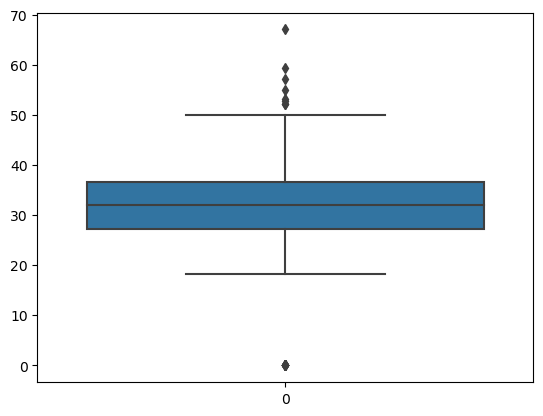

In [13]:
sns.boxplot(df['body mass index'])

In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
x,y = df.iloc[:,:-1],df.iloc[:,-1]

In [16]:
x.shape

(768, 8)

In [17]:
y.shape

(768,)

In [18]:
s = StandardScaler()
scaled_data = s.fit_transform(x)

In [19]:
scaled_data.shape

(768, 8)

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,classification_report

In [21]:
xtrain, xtest, ytrain, ytest = train_test_split(scaled_data,y, test_size=0.20, stratify=y, random_state=34)

In [22]:
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

((614, 8), (154, 8), (614,), (154,))

In [4]:
from keras.models import Sequential

In [5]:
import keras.layers

In [3]:
print(dir(keras.layers))

['AbstractRNNCell', 'Activation', 'ActivityRegularization', 'Add', 'AdditiveAttention', 'AlphaDropout', 'Attention', 'Average', 'AveragePooling1D', 'AveragePooling2D', 'AveragePooling3D', 'AvgPool1D', 'AvgPool2D', 'AvgPool3D', 'BatchNormalization', 'Bidirectional', 'CategoryEncoding', 'CenterCrop', 'Concatenate', 'Conv1D', 'Conv1DTranspose', 'Conv2D', 'Conv2DTranspose', 'Conv3D', 'Conv3DTranspose', 'ConvLSTM1D', 'ConvLSTM2D', 'ConvLSTM3D', 'Convolution1D', 'Convolution1DTranspose', 'Convolution2D', 'Convolution2DTranspose', 'Convolution3D', 'Convolution3DTranspose', 'Cropping1D', 'Cropping2D', 'Cropping3D', 'Dense', 'DenseFeatures', 'DepthwiseConv1D', 'DepthwiseConv2D', 'Discretization', 'Dot', 'Dropout', 'ELU', 'EinsumDense', 'Embedding', 'Flatten', 'GRU', 'GRUCell', 'GaussianDropout', 'GaussianNoise', 'GlobalAveragePooling1D', 'GlobalAveragePooling2D', 'GlobalAveragePooling3D', 'GlobalAvgPool1D', 'GlobalAvgPool2D', 'GlobalAvgPool3D', 'GlobalMaxPool1D', 'GlobalMaxPool2D', 'GlobalMaxPo

In [ ]:
RNN()

In [2]:
from keras.layers import Dense,Dropout, RNN, LSTM ,Conv2D

In [ ]:
Conv2D()

In [ ]:
2,4,8,16,32,64,128,516

In [6]:
model = Sequential()
model.add(Dense(16, input_dim=8,kernel_initializer='he_normal',activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(16,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                144       
                                                                 
 dense_1 (Dense)             (None, 32)                544       
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dense_3 (Dense)             (None, 1)                 17        
                                                                 
Total params: 1233 (4.82 KB)
Trainable params: 1233 (4.82 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [10]:
model.layers[0].get_weights()

[array([[-0.04860553,  0.22408119, -0.7039242 ,  0.919321  , -0.11454633,
         -0.08724165,  0.28746772,  0.64731246, -0.15763639,  0.69052595,
          0.15967648,  0.04946246, -0.22234163,  0.04840401,  0.02374179,
          0.6097204 ],
        [-0.04180164,  0.70685166, -0.23607603,  0.17387688, -0.35736188,
         -0.32379207,  0.2917975 , -0.74121743,  0.7109124 ,  0.30507687,
         -0.20500547,  1.0989311 , -0.19359753, -0.61369133, -0.29523706,
          0.06981006],
        [ 0.00824488, -0.34042153, -0.23114565, -0.27453965, -0.47267565,
         -0.00174429,  0.12046951, -0.3353279 , -0.44040793, -0.4675145 ,
         -0.8009242 ,  0.44762966,  0.4933791 , -0.43349674,  0.14771946,
          0.39255288],
        [ 0.8473842 , -0.35813782,  0.48680133, -0.2239245 , -0.16301559,
         -0.3978402 , -0.24560452,  0.8153111 ,  0.08365247,  0.5804705 ,
          0.41257855, -0.25967893,  0.15714811, -0.3463148 , -0.01363434,
         -1.0383145 ],
        [-0.05875972

In [26]:
model.compile(loss='binary_crossentropy',metrics=['accuracy'])

In [27]:
model.fit(xtrain,ytrain,batch_size=32,epochs=5)

Epoch 1/5
20/20 [==============================] - 1s 4ms/step - loss: 0.7118 - accuracy: 0.4528
Epoch 2/5
20/20 [==============================] - 0s 5ms/step - loss: 0.6304 - accuracy: 0.6824
Epoch 3/5
20/20 [==============================] - 0s 3ms/step - loss: 0.6004 - accuracy: 0.7117
Epoch 4/5
20/20 [==============================] - 0s 6ms/step - loss: 0.5560 - accuracy: 0.7313
Epoch 5/5
20/20 [==============================] - 0s 5ms/step - loss: 0.5259 - accuracy: 0.7476


In [28]:
model.fit(xtrain,ytrain,batch_size=32,epochs=5)

Epoch 1/5
20/20 [==============================] - 0s 6ms/step - loss: 0.4983 - accuracy: 0.7573
Epoch 2/5
20/20 [==============================] - 0s 5ms/step - loss: 0.5008 - accuracy: 0.7655
Epoch 3/5
20/20 [==============================] - 0s 4ms/step - loss: 0.4736 - accuracy: 0.7801
Epoch 4/5
20/20 [==============================] - 0s 5ms/step - loss: 0.4793 - accuracy: 0.7704
Epoch 5/5
20/20 [==============================] - 0s 5ms/step - loss: 0.4674 - accuracy: 0.7606


In [67]:
result = model.predict(xtest)>0.5

5/5 [==============================] - 0s 3ms/step


In [68]:
type(result)

numpy.ndarray

In [70]:
pred = 1*result

In [71]:
accuracy_score(ytest,pred)

0.7402597402597403